In [761]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.ticker as ticker

In [732]:
'''
1 - Abri o arquivo na forma de DataFrame
2 - Como o arquivo veio com uma coluna apenas, transformei em 7 colunas
3 - Deletei a coluna única
'''

file = pd.read_csv('COVID19.csv')
file['region'],file['sigla'],file['date'],file['cases_inc'],file['cases'],file['deaths_inc'],file['deaths']= file['region;sigla;date;cases_inc;cases;deaths_inc;deaths'].str.split(";", 7).str

del file['region;sigla;date;cases_inc;cases;deaths_inc;deaths']

<h1>Mortes por dia (BRASIL)</h1>

In [734]:
'''
1 - Pegando as colunas de interesse
2 - Transformando o número de mortes em inteiros
3 - Transformando as datas em dates
'''

microDados = file.filter(items=['date','deaths'])
microDados['deaths'] = microDados.deaths.astype('int64')
microDados['date'] = microDados.date.astype('datetime64[D]')

In [741]:
microDados['date']

0      2020-01-30
1      2020-01-31
2      2020-01-02
3      2020-02-02
4      2020-03-02
          ...    
1939   2020-06-04
1940   2020-07-04
1941   2020-08-04
1942   2020-09-04
1943   2020-10-04
Name: date, Length: 1944, dtype: datetime64[ns]

In [744]:
dados = microDados.groupby('date').sum()

In [736]:
y = list(dados['deaths'])
y = sorted(y)
len(y)

72

In [745]:
file['date']

0     30/01/2020
1     31/01/2020
2     01/02/2020
3     02/02/2020
4     03/02/2020
         ...    
67    06/04/2020
68    07/04/2020
69    08/04/2020
70    09/04/2020
71    10/04/2020
Name: date, Length: 72, dtype: object

In [746]:
microDados['date'].drop_duplicates(inplace=True)

In [748]:
len(microDados['date'])

72

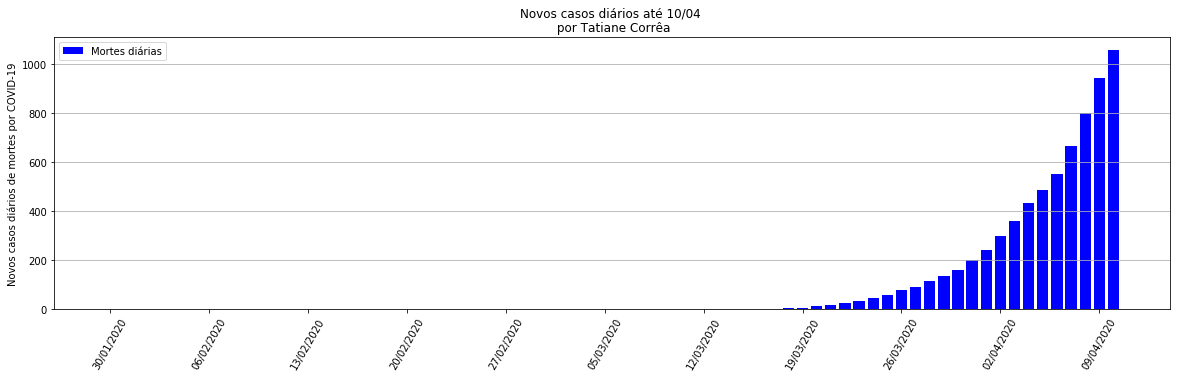

In [771]:
plt.figure(figsize = (20,5))
#plt.scatter(file['date'],file['deaths'], color = 'blue')
plt.bar(file['date'],y, color = 'blue', label = 'Mortes diárias')
plt.xticks(rotation=60)
#plt.xlim(start - np.datetime64(days = 3))
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.title('Novos casos diários até 10/04 \n por Tatiane Corrêa')
plt.ylabel('Novos casos diários de mortes por COVID-19')
plt.grid(axis='y')
plt.legend()
plt.savefig('mortes_diarias.png')
plt.show()